In [68]:
import numpy as np
import matplotlib.pyplot as plt
import math
import sklearn
import keras

x1_data = np.linspace(-1, 1, num=100000)
x2_data = np.linspace(-1, 1, num=100000)
np.random.shuffle(x2_data)
x_data1 = x1_data + 2*x2_data



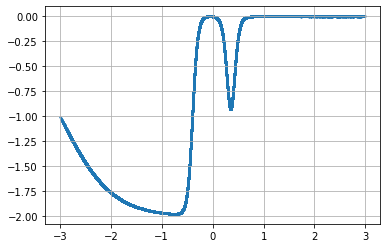

In [69]:

y_data1 = - np.tanh(10*x_data1-3) - np.tanh(x_data1+3)+ np.tanh(10*x_data1-4) + np.tanh(10*x_data1+4) + 0.0001*np.random.normal(size=100000)


plt.scatter(x_data1[::1], y_data1[::1], s=2)
plt.grid()
plt.show()


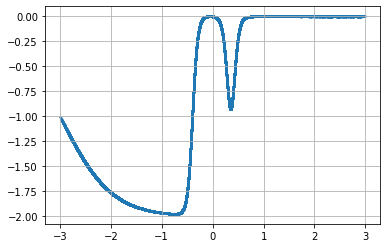

In [70]:
#Data Shuffling
data = []
for i in range(0,len(x_data1)):
  data.append([x_data1[i],y_data1[i]])

np.random.shuffle(data)
x_data = []
y_data = []

for i in data:
  x_data.append(i[0])
  y_data.append(i[1])

plt.scatter(x_data[::1], y_data[::1], s=2)
plt.grid()
plt.show()

In [71]:

x_data = temp1
y_data = temp2
x_train = x_data[:len(x_data) - len(x_data)//10]
x_test = x_data[len(x_data) - len(x_data)//10:]
print(len(x_train),len(x_test))

y_train = y_data[:len(y_data) - len(y_data)//10]
y_test = y_data[len(y_data) - len(y_data)//10:]
print(len(x_train),len(x_test))

180000 20000
180000 20000


In [72]:
model = keras.Sequential()
model.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[1]))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 1, activation = 'linear'))
model.compile(loss='mse', optimizer="adam")
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_41 (Dense)             (None, 64)                128       
_________________________________________________________________
dense_42 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 65        
Total params: 4,355
Trainable params: 4,355
Non-trainable params: 0
_________________________________________________________________


In [73]:

model.fit( x_train, y_train, epochs=100, verbose=1)

Epoch 1/100
5625/5625 [==============================] - 6s 1ms/step - loss: 5.1043e-04
Epoch 2/100
5625/5625 [==============================] - 6s 1ms/step - loss: 1.1849e-04
Epoch 3/100
5625/5625 [==============================] - 6s 1ms/step - loss: 1.1611e-04
Epoch 4/100
5625/5625 [==============================] - 6s 1ms/step - loss: 1.1428e-04
Epoch 5/100
5625/5625 [==============================] - 6s 1ms/step - loss: 1.1239e-04
Epoch 6/100
5625/5625 [==============================] - 6s 1ms/step - loss: 1.1175e-04
Epoch 7/100
5625/5625 [==============================] - 6s 1ms/step - loss: 1.1051e-04
Epoch 8/100
5625/5625 [==============================] - 6s 1ms/step - loss: 1.1030e-04
Epoch 9/100
5625/5625 [==============================] - 6s 1ms/step - loss: 1.0971e-04
Epoch 10/100
5625/5625 [==============================] - 6s 1ms/step - loss: 1.1002e-04
Epoch 11/100
5625/5625 [==============================] - 6s 1ms/step - loss: 1.0896e-04
Epoch 12/100
5625/5625 [======

In [74]:
y_predicted = model.predict(x_test)


from sklearn.metrics import mean_squared_error 

mean_squared_error(y_test,y_predicted) 

0.00010836595241403694